In [100]:
#import libraries
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [101]:
#load the data
def laod_data():
    data = sns.load_dataset("tips")
    return data

In [102]:
data = laod_data()
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [103]:
#encode the categorical variable sex
label_encoder =  LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex']) 
data


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,No,Sat,Dinner,3
240,27.18,2.00,0,Yes,Sat,Dinner,2
241,22.67,2.00,1,Yes,Sat,Dinner,2
242,17.82,1.75,1,No,Sat,Dinner,2


In [104]:
x = data[["total_bill","sex"]]
y = data["tip"]
#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.8)

In [105]:
#train the linear model
linear_regression_invscaling = SGDRegressor(max_iter=1000, learning_rate = 'invscaling', eta0=0.01, random_state=42)
linear_regression_constant = SGDRegressor(max_iter=1000, learning_rate = 'constant', eta0=0.01, random_state=42)
linear_regression_optimal = SGDRegressor(max_iter=1000, learning_rate = 'invscaling', eta0=0.01, random_state=42)
model_invscaling = linear_regression_invscaling.fit(x_train, y_train)
model_constant = linear_regression_constant.fit(x_train, y_train)
model_optimal = linear_regression_optimal.fit(x_train, y_train)

In [115]:
#predict the output
features = [[20,1]]
y_invscaling = model_invscaling.predict(features)
y_constant = model_constant.predict(features)
y_optimal = model_optimal.predict(features)
print("Invascling Predicted value: ", y_invscaling)
print("Constant Predicted value: ", y_constant)
print("Optimal Predicted value: ", y_optimal)

Invascling Predicted value:  [3.00289039]
Constant Predicted value:  [-7.05283353e+12]
Optimal Predicted value:  [3.00289039]


c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(
c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(
c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


In [110]:
#compute the mean square error
y_pred_invscaling = model_invscaling.predict(x_test)
y_pred_constant = model_constant.predict(x_test)
y_pred_optimal = model_optimal.predict(x_test)
mse_invscaling = mean_squared_error(y_test,y_pred_invscaling)
mse_constant = mean_squared_error(y_test,y_pred_constant)
mse_optimal = mean_squared_error(y_test,y_pred_optimal)
print("mse for invscaling: ", mse_invscaling)
print("mse for constant: ", mse_constant)   
print("mse for optimal: ", mse_optimal)

mse for invscaling:  1.250525054060192
mse for constant:  5.8932824957778885e+25
mse for optimal:  1.250525054060192


In [111]:
#train the linear regression model without gradient descent
linear_regression = LinearRegression()
model = linear_regression.fit(x_train, y_train)

In [116]:
#predict the model
features = [[20,1]]
prediction = model.predict(features)
print(prediction)

[2.97732719]


c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [117]:
#compute the mean squared error
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
print(mse)

1.1750833390267355


c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


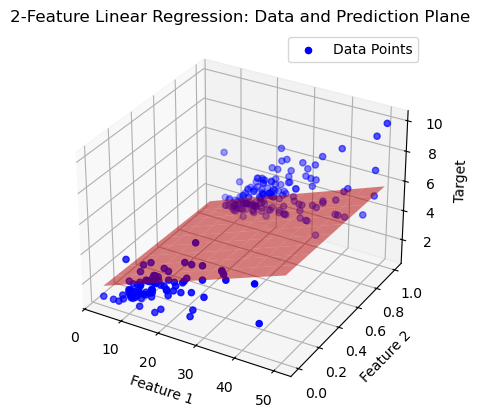

In [126]:
# Split features
# Prepare grid for regression plane
x1_range = np.linspace(x.iloc[:, 0].min(), x.iloc[:, 0].max(), 10)
x2_range = np.linspace(x.iloc[:, 1].min(), x.iloc[:, 1].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
X_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred_grid = model.predict(X_grid).reshape(x1_grid.shape)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Scatter data points
ax.scatter(x.iloc[:, 0], x.iloc[:, 1], y, color='blue', label='Data Points')
# Plot regression plane
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, alpha=0.5, color='red')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.title('2-Feature Linear Regression: Data and Prediction Plane')
plt.legend()
plt.show()